In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./Salary_dataset.csv',usecols=['YearsExperience','Salary'])
data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [7]:
data.shape

(30, 2)

In [8]:
data.size

60

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [9]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
data.duplicated().sum()

0

### Histogram

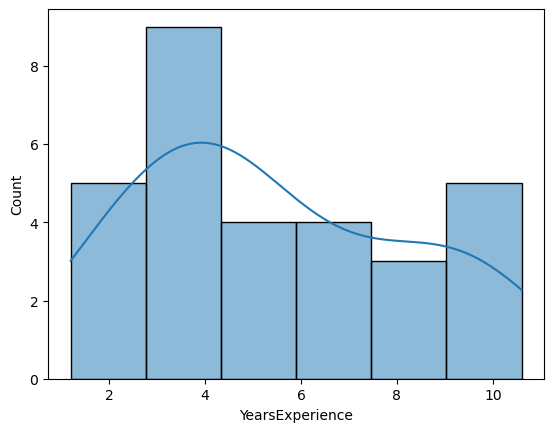

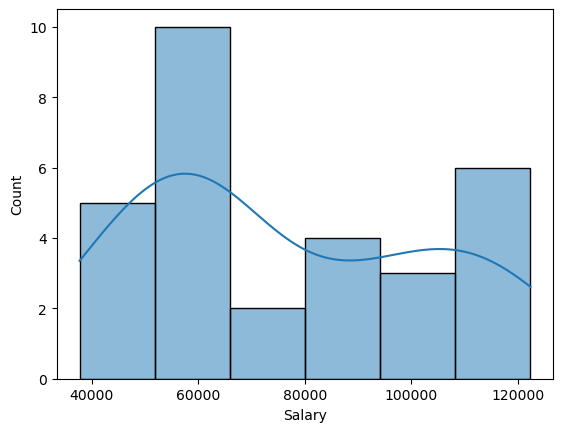

In [13]:
for i in data.columns:
    sns.histplot(x=data[i],kde=True)
    plt.show()

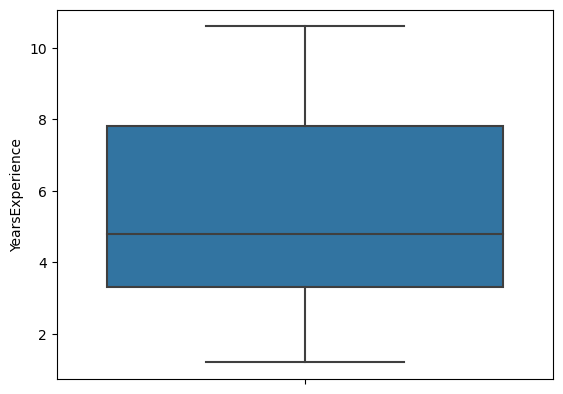

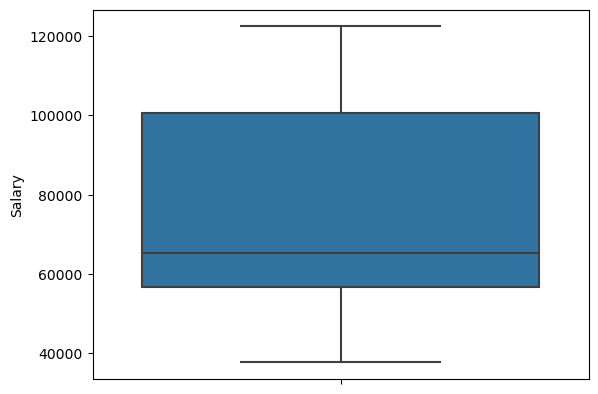

In [14]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show()

In [15]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

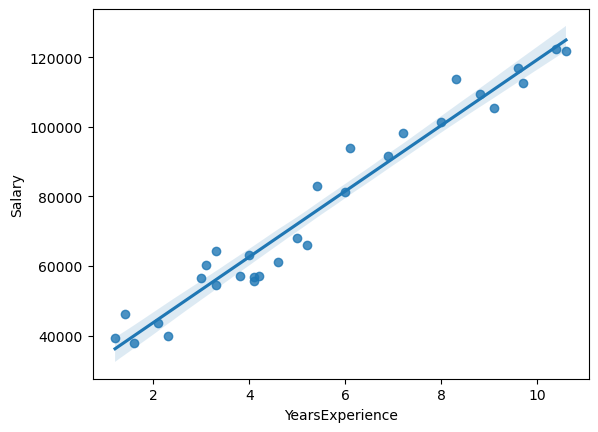

In [16]:
sns.regplot(data=data,x='YearsExperience',y='Salary')
plt.show()

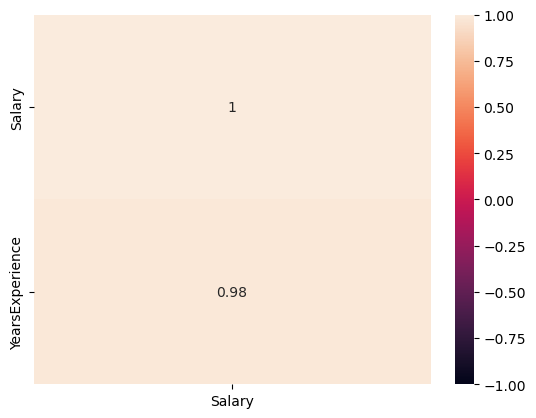

In [18]:
sns.heatmap(data.corr()[['Salary']].sort_values(by='Salary',ascending=False),vmax=1,vmin=-1,annot=True);

### Features and targets

In [19]:
x = data.iloc[:,:-1].values

In [20]:
x

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [21]:
y = data.iloc[:,-1].values

In [22]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

In [29]:
sc = StandardScaler()

In [30]:
x = sc.fit_transform(x)

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=99)

In [86]:
model = LinearRegression()

In [87]:
model.fit(x_train,y_train)

LinearRegression()

In [88]:
y_pred = model.predict(x_test)

In [89]:
y_pred

array([102644.11689315, 107266.35038526,  73986.26924208,  63817.35555945,
        92475.20321051, 115586.37067105])

### Accuracy evaluation

In [90]:
r2_score(y_test,y_pred)

0.9102354571044846

In [91]:
model.score(x_test,y_test)

0.9102354571044846

In [79]:
model.score(x_train,y_train)

0.9529778812782739

In [80]:
mean_absolute_error(y_test,y_pred)

4590.519473789987

In [81]:
mean_squared_error(y_test,y_pred)

29937204.595710132

In [82]:
np.sqrt(mean_squared_error(y_test,y_pred))

5471.490162260198

In [83]:
OUTPUT = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])
OUTPUT.head()

,Actual,Prediction
0,83089.0,75488.271815
1,109432.0,107724.703354
2,116970.0,115309.746070
3,37732.0,39459.318917
4,46206.0,37563.058239


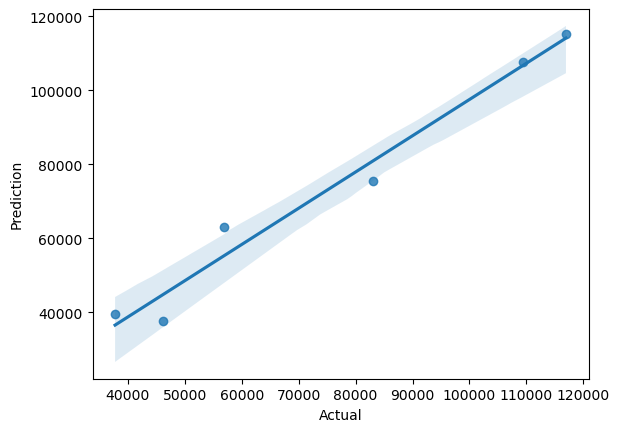

In [84]:
sns.regplot(data=OUTPUT,x='Actual',y='Prediction')
plt.show()